In [171]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [172]:
#creating a straight line dataset using linear regression formula
weight = 0.3
bias = 0.9

X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = weight * X + bias
X,X.numel(),y

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

In [173]:
# splitting training and testing set
train_split = int(0.8*len(X)) #80% of total datapoints are reserved for training, rest for testing.
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
X_train.numel(),X_test.numel(),y_train.numel(),y_test.numel()

(80, 20, 80, 20)

In [174]:
# function for plotting data predictions
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(5,5))
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
    plt.scatter(test_data,test_labels,c='y',s=4,label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label="predictions")

    plt.legend()

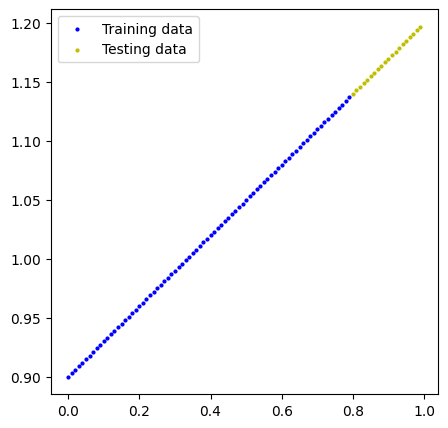

In [175]:
plot_predictions();

In [176]:
#BUILDING THE MODEL
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #nn.Parameter is trying to register our parameters in the parameters() method of the module so that optimizers can update the paramters from the parameters().
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #nn.Parameter is trying to register our parameters in the parameters() method of the module so that optimizers can update the paramters from the parameters().

    def forward(self,X:torch.tensor)-> torch.Tensor:
        return self.weights * X + self.bias
        

In [177]:
torch.manual_seed(8)
model = LinearRegressionModel()

In [178]:
model.state_dict(),list(model.parameters())

(OrderedDict([('weights', tensor([0.2713])), ('bias', tensor([-1.2729]))]),
 [Parameter containing:
  tensor([0.2713], requires_grad=True),
  Parameter containing:
  tensor([-1.2729], requires_grad=True)])

In [179]:
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[-1.0559],
        [-1.0532],
        [-1.0505],
        [-1.0478],
        [-1.0450],
        [-1.0423],
        [-1.0396],
        [-1.0369],
        [-1.0342],
        [-1.0315],
        [-1.0288],
        [-1.0261],
        [-1.0233],
        [-1.0206],
        [-1.0179],
        [-1.0152],
        [-1.0125],
        [-1.0098],
        [-1.0071],
        [-1.0044]])

In [180]:
#setting up loss function and optimizers
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [187]:
#creating a training loop
epochs = 300

epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):

    #setting train mode
    model.train()

    #forward pass
    y_pred = model(X_train)

    #finding loss
    loss = loss_fn(y_pred,y_train)
    print(f"Loss:{loss}")

    #optimizer zero grad
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred,y_test)

    if epoch % 20 == 0 :
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'epochs:{epoch},loss:{loss},test loss:{test_loss}')
        print(model.state_dict())


Loss:0.10131232440471649
epochs:0,loss:0.10131232440471649,test loss:0.2344726324081421
OrderedDict({'weights': tensor([0.8016]), 'bias': tensor([0.6856])})
Loss:0.10096961259841919
Loss:0.10062692314386368
Loss:0.10028421878814697
Loss:0.09994152188301086
Loss:0.09959881007671356
Loss:0.09925612062215805
Loss:0.09891341626644135
Loss:0.09857071191072464
Loss:0.09822801500558853
Loss:0.09788531064987183
Loss:0.09754260629415512
Loss:0.09719991683959961
Loss:0.09685719758272171
Loss:0.0965145006775856
Loss:0.09617181122303009
Loss:0.09582910686731339
Loss:0.09548640251159668
Loss:0.09514369070529938
Loss:0.09480100125074387
Loss:0.09445829689502716
epochs:20,loss:0.09445829689502716,test loss:0.21917743980884552
OrderedDict({'weights': tensor([0.7677]), 'bias': tensor([0.7006])})
Loss:0.09411559998989105
Loss:0.09377288073301315
Loss:0.09343019872903824
Loss:0.09308748692274094
Loss:0.09274478256702423
Loss:0.09240208566188812
Loss:0.09205938875675201
Loss:0.09171666204929352
Loss:0.091

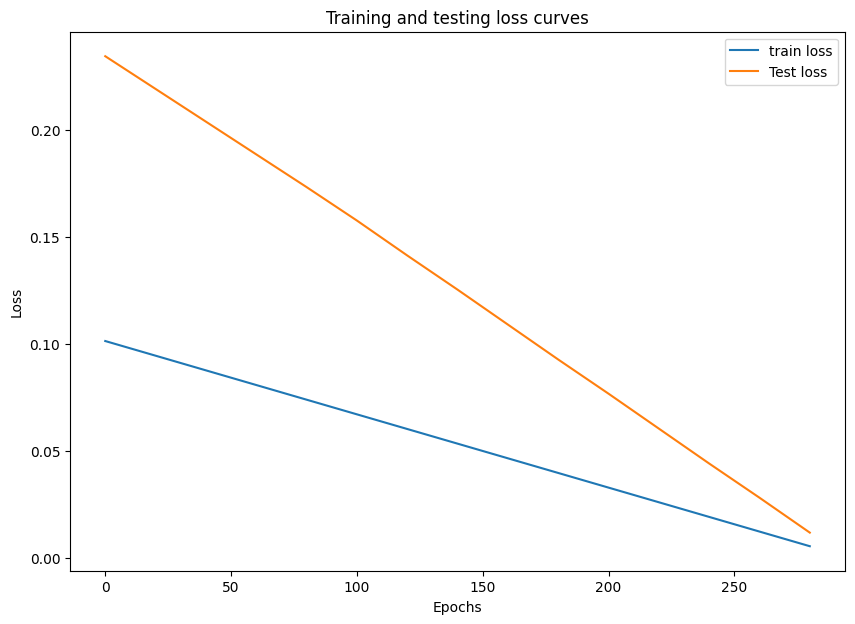

In [188]:
# visualizing the train and test loss 
plt.figure(figsize=(10,7))
plt.plot(epoch_count,(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [189]:
model.state_dict(),weight,bias

(OrderedDict([('weights', tensor([0.3056])), ('bias', tensor([0.8953]))]),
 0.3,
 0.9)

In [184]:
with torch.inference_mode():
    y_preds_new = model(X_test)

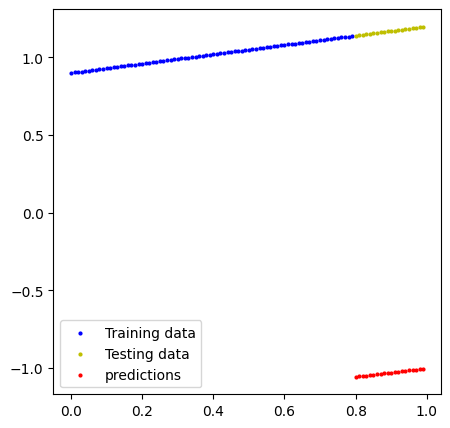

In [185]:
plot_predictions(predictions=y_preds);

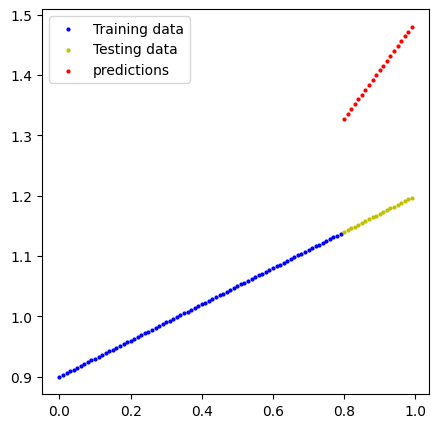

In [186]:
plot_predictions(predictions=y_preds_new);